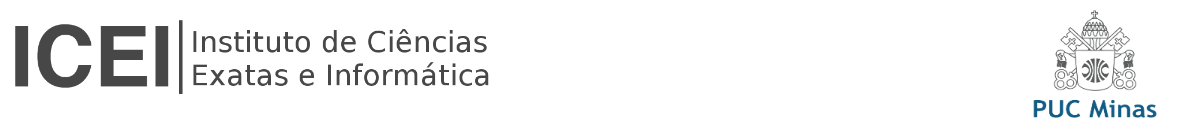

---

# Introdução ao Tensorflow - Parte 2

---

#### Professor: Felipe Reis

#### Data: 2023-11-14

---
### Importação de bibliotecas

In [ ]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import random
import time

#import plot_images
from plot_helper import plot_helper as plotter

#tensorflow
import tensorflow as tf
from tensorflow.python.client import device_lib
from tensorflow import keras

---
## Base de Dados CIFAR-10

A base de dados CIFAR-10 consiste em 60.000 imagens coloridas de 32x32, divididas em 10 classes.
Cada classe contém 6.000 imagens por classe.
O conjunto é dividido em 50.000 imagens de treinamento e 10.000 imagens de teste.

CIFAR é o acrônimo de Canadian Institute For Advanced Research, proprietário da base de dados.
O CIFAR-10 e CIFAR-100 são subconjuntos rotulados de uma base de dados de pequenas imagens que contém 80 milhões de amostras.

As imagens foram coletadas por Alex Krizhevsky, Vinod Nair e Geoffrey Hinton.

A base está disponível em: https://www.cs.toronto.edu/~kriz/cifar.html

Ela também está disponível na página do Tensorflow: https://www.tensorflow.org/datasets/catalog/cifar10

![CIFAR 10](https://cdn-images-1.medium.com/max/1200/1*SZnidBt7CQ4Xqcag6rd8Ew.png)

Fonte: *Jannik Zürn. **Training a CIFAR-10 classifier in the cloud using TensorFlow and Google Colab**. 2018. Disponível em: https://jannik-zuern.medium.com/training-a-cifar-10-classifier-in-the-cloud-using-tensorflow-and-google-colab-f3a5fbdfe24d. Acesso em: 05 de outubro de 2021.*

In [ ]:
#download da base de dados
cifar10 = keras.datasets.cifar10

#divisão em base de treinamento e testes (subdividido em imagens e labels)
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

#remove 1 dimensão dos arrays de label
train_labels = np.squeeze(train_labels)
test_labels = np.squeeze(test_labels)

In [ ]:
#impressão da quantidade de imagens da base
print('Conjunto treino: {} amostras'.format(len(train_images)))
print('Conjunto teste: {} amostras'.format(len(test_images)))

In [ ]:
#definicao dos nomes das classes
class_names = ['Avião', 'Automóvel', 'Pássaro', 'Gato', 'Veado',
               'Cachorro', 'Sapo', 'Cavalo', 'Barco', 'Caminhão']

### Análise dos Dados

In [ ]:
plotter.plot_images(train_images, train_labels, class_names, random=False)

### Ferramenta KnowYourData (Google Research)

Podemos ver mais informações sobre a base de dados utilizando o link abaixo:

https://knowyourdata-tfds.withgoogle.com/#tab=STATS&dataset=cifar10

O site KnowYourData é mantido pelo Google e contém informações e estatísticas sobre conjuntos de dados.

Ele permite realizar uma análise visual do conjunto, para que possamos entender o tipo de informação que desejamos aprender.

---
## Pré processamento

Podemos tentar classificar o conjunto de dados utilizando os mesmos modelos utilizados no Notebook 1.

In [ ]:
#pré processamento
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
plotter.plot_images(train_images, train_labels, class_names, random=False)

---
## Treinamento do Modelo

O modelo de rede neural abaixo é baseado na arquitetura existente no Notebook 1.

Para adequação ao conjunto CIFAR-10, a entrada foi alterada para suportar imagens de tamanho 32 $\times$ 32 pixels, com 3 canais de cores.

In [ ]:
#modelo de rede sequencial
model1 = keras.Sequential([
    #transforma a image em um array de imagens de três dimensões (32 x 32 x 3)
    keras.layers.Flatten(input_shape=(32, 32, 3)),

    #Camada de dados totalmente conectadas, com ativação relu
    #A camada possui 128 nós (neurônios)
    keras.layers.Dense(128, activation='relu'),

    #Camada de dados totalmente conectadas, com ativação softmax
    #A camada possui 10 nós (neurônios), correspondentes às probabilidades de cada classe (10 classes)
    keras.layers.Dense(10, activation='softmax')
])

### Compilação do Modelo

In [ ]:
#compila o modelo
model1.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Configurações de Treinamento

Nesta seção serão detalhadas as algumas configurações de treinamento, ao utilizar o comando `model.fit`.

Informações mais detalhadas e outros parâmetros podem ser encontradas no link: https://keras.io/api/models/model_training_apis/#fit-method

*Obs.: Outras operações que influenciam o treinamento, como otimizadores, serão vistas nos próximos notebooks.*

#### Treino e Validação

Podemos explicitamente dividir os conjuntos de treino e validação, indicando o percentual de divisão.

Para isso, devemos utilizar o atributo `validation_split`.

In [ ]:
#realiza o treinamento da rede
model1.fit(train_images, train_labels, validation_split=0.2, epochs=10)

#### Tamanho do Batch

Podemos indicar o número de amostras utilizadas em um mesmo passo do algoritmo (a cada atualização da função de perda).

Para isso, devemos utilizar o atributo `batch_size`.

O número de amostras no atributo *batch_size* pode variar de acordo com o tamanho da imagem de entrada, tarefa executada (classificação, segmentação) e capacidade de memória da placa de vídeo.

O valor *default* do argumento é 32. No entanto, caso a placa de rede tenha pouca memória, podemos reduzir o tamanho do *batch*, de modo que o número de imagens processadas concomitantemente seja menor. Caso tenhamos memória disponível, podemos aumentar o tamanho do batch de modo a aumentar a velocidade de treinamento.

Mais informações podem ser encontradas em: https://keras.io/api/models/model_training_apis/#fit-method

In [ ]:
#realiza o treinamento da rede
model1.fit(train_images, train_labels, batch_size=256, validation_split=0.2, epochs=10)

#### Impressão de Resultados Intermediários

Podemos indicar qual o nível de detalhamento das informações a serem exibidas durante o treinamento.

Para isso, devemos utilizar o atributo `verbose`.

O atributo *verbose* pode ser dividido em 3 níveis:

0. ***Silencioso***. Não imprime informações sobre o treinamento.
1. ***Barra de Progresso*** (Padrão). Exibe o status do treinamento e uma barra de progresso.
2. ***Linha por época***. Exibe uma linha por época durante o treinamento (pode ser usado para criação de *logs*).

In [ ]:
#realiza o treinamento da rede
model1.fit(train_images, train_labels, batch_size=128, validation_split=0.2, epochs=10, verbose=0)

In [ ]:
#realiza o treinamento da rede
model1.fit(train_images, train_labels, batch_size=128, validation_split=0.2, epochs=10, verbose=2)

#### Épocas de Treinamento

O atributo `epochs` é utilizado para definir o número de ciclos de atualização de pesos da rede.

Cada ciclo passa por todo o conjunto de dados e denominado época.

Ao aumentar em excesso a quantidade de épocas de treinamento, pode-se gerar um problema indesejado, denominado *overfitting*. Esse problema ocorre quando a rede neural passa a decorar as informações, ao invés de generalizar seu conhecimento. Com isso, apesar o desempenho no conjunto de treinamento ser mais alto, a rede terá um desempenho mais baixo no conjunto de testes.


![Overfitting](https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Overfitting.svg/600px-Overfitting.svg.png)
Fonte: Wikipedia Contributors. Overfitting. 2021. Disponível em: https://en.wikipedia.org/wiki/Overfitting. Acesso em: 05 de outubro de 2021.

In [ ]:
#realiza o treinamento da rede
model1.fit(train_images, train_labels, batch_size=128, validation_split=0.2, epochs=20, verbose=1)

#### Gráfico de treinamento

A partir do treinamento da rede neural, podemos gerar um gráfico do treinamento.

Tal tarefa pode ser usada para melhor visualização das informações, além da análise de um possível *overfitting* da rede durante o treinamento.

In [ ]:
history = model1.fit(train_images, train_labels, validation_split=0.2, epochs=20, verbose=0)
print(history.history.keys())

In [ ]:
# plota o gráfico
fig=plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

#exibe legenda, títulos e nomes dos eixos
plt.title('Perda do modelo')
plt.ylabel('Perda (Loss)')
plt.xlabel('Épocas')
plt.legend(['treinamento', 'validação'], loc='upper left')

In [ ]:
# plota o gráfico
fig=plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

#exibe legenda, títulos e nomes dos eixos
plt.title('Acurácia do modelo')
plt.ylabel('Acurácia')
plt.xlabel('Épocas')
plt.legend(['treinamento', 'validação'], loc='upper left')

##### Plotar Gráfico de Treinamento (Helper)

Podemos plotar o gráfico de treinamento com auxílio de uma função criada na classe Helper, utilizando o comando abaixo.

In [ ]:
# plota o gráfico
plotter.plot_history_training(history, metrics=['accuracy', 'val_accuracy'], legend=['Treinamento', 'Validação'])

### Avaliação do modelo

In [ ]:
#avaliação do modelo
test_loss, test_acc = model1.evaluate(test_images,  test_labels)
print('Acurácia de testes: %.4f', test_acc)

----
----

## Tarefas

### Tarefa 1 (30 minutos)

Treine a rede desenvolvida na Tarefa 2 (Notebook 1) no conjunto de dados CIFAR-10.

Para adequação ao conjunto, lembre-se de alterar a entrada para suportar imagens de tamanho 32 $\times$ 32 pixels, com 3 canais de cores.

#### Atividades Sugeridas

- Altere o percentual de divisão dos conjuntos de validação e treinamento;
- Altere o tamanho do *batch*;
- Altere o número de épocas de treinamento;
- Escolha um método de impressão de resultados intermediários, para construção de um *log*;
- Plote gráficos para verificar a existência de overfitting.

In [ ]:
#insira seu modelo aqui (arquitetura de rede)

In [ ]:
#compile seu modelo aqui

In [ ]:
#treine seu modelo aqui

In [ ]:
#imprima o gráfico de treinamento aqui

In [ ]:
#avalie seu modelo aqui